Note: CUDA-Q uses the ```QuTiP``` library to render Bloch spheres.  The following code will throw an error if QuTiP is not installed.  
```pip install QuTiP```

In [2]:
# The '\' before the '>' operator is so that the shell does not misunderstand
# the '>' qualifier for the bash pipe operation.

import sys

try:
    import matplotlib.pyplot as plt
    import qutip

except ImportError:
    print("Tools not found, installing. Please restart your kernel after this is done.")
    !{sys.executable} -m pip install qutip\>=5 matplotlib\>=3.5            
    print("\nNew libraries have been installed. Please restart your kernel!")


In [12]:
import cudaq
import numpy as np

@cudaq.kernel
def kernel(angles: np.ndarray):
    qubit = cudaq.qubit()
    rz(angles[0], qubit)
    rx(angles[1], qubit)
    rz(angles[2], qubit)

In [15]:
rng = np.random.default_rng(seed=11)
blochSphereList = []
for _ in range(4):
    angleList = rng.random(3) * 2 * np.pi
    sph = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel, angleList))
    blochSphereList.append(sph)

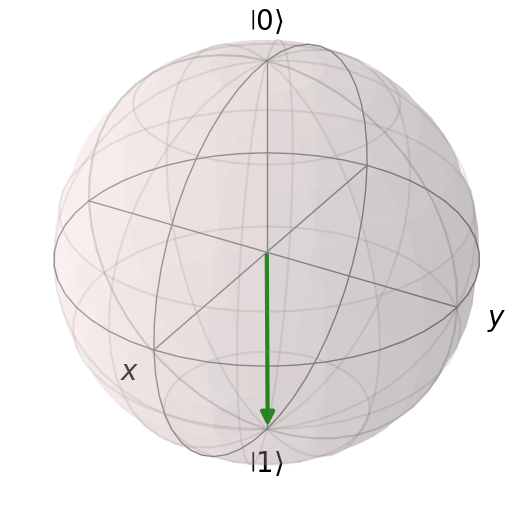

In [16]:
cudaq.show(blochSphereList[0])

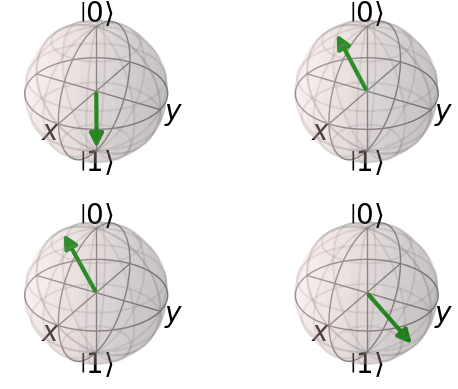

In [22]:
cudaq.show(blochSphereList, nrows=2, ncols=2)

What if we had to add multiple vectors to a single Bloch sphere? 

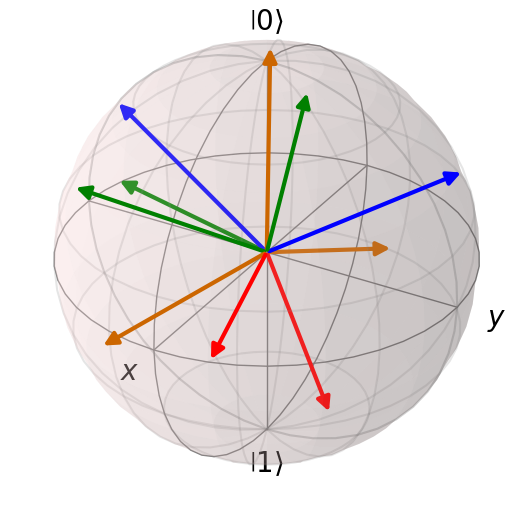

In [23]:
import qutip

rng = np.random.default_rng(seed=47)
blochSphere = qutip.Bloch()
for _ in range(10):
    angleList = rng.random(3) * 2 * np.pi
    sph = cudaq.add_to_bloch_sphere(cudaq.get_state(kernel, angleList), blochSphere)

    
blochSphere.show()

# Kernel Visualization  
A CUDA-Q kernel can be visualized using the ```cudaq.draw``` API which returns a string representing the drawing of the execution path, in the specified format.

In [ ]:
@cudaq.kernel
def kernel_to_draw():
    q = cudaq.qvector(4)
    h(q)
    x.ctrl(q[0], q[1])
    y.ctrl([q[0], q[1]], q[2])
    z(q[2])

    swap(q[0], q[1])
    swap(q[0], q[3])
    swap(q[1], q[2])

    r1(3.14159, q[0])
    tdg(q[1])
    s(q[2])

In [26]:
print(cudaq.draw(kernel_to_draw))

     ╭───╮                  ╭───────────╮       
q0 : ┤ h ├──●────●────╳───╳─┤ r1(3.142) ├───────
     ├───┤╭─┴─╮  │    │   │ ╰───────────╯╭─────╮
q1 : ┤ h ├┤ x ├──●────╳───┼───────╳──────┤ tdg ├
     ├───┤╰───╯╭─┴─╮╭───╮ │       │      ╰┬───┬╯
q2 : ┤ h ├─────┤ y ├┤ z ├─┼───────╳───────┤ s ├─
     ├───┤     ╰───╯╰───╯ │               ╰───╯ 
q3 : ┤ h ├────────────────╳─────────────────────
     ╰───╯                                      



In [27]:
print(cudaq.draw('latex', kernel_to_draw))

\documentclass{minimal}
\usepackage{quantikz}
\begin{document}
\begin{quantikz}
  \lstick{$q_0$} & \gate{H} & \ctrl{1} & \ctrl{2} & \swap{1} & \swap{3} & \gate{R_1(3.142)} & \qw & \qw \\
  \lstick{$q_1$} & \gate{H} & \gate{X} & \ctrl{1} & \targX{} & \qw & \swap{1} & \gate{T^\dag} & \qw \\
  \lstick{$q_2$} & \gate{H} & \qw & \gate{Y} & \gate{Z} & \qw & \targX{} & \gate{S} & \qw \\
  \lstick{$q_3$} & \gate{H} & \qw & \qw & \qw & \targX{} & \qw & \qw & \qw \\
\end{quantikz}
\end{document}

